<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 Regression Challenge

_Authors: Joel Quek (SG)_

# REFER TO [REGRESSION LAB 3.01](https://github.dev/joel-quek/General-Assembly-DSI) [DELETE LATER]

# Problem Statement

What are factors affecting housing price?

**Create a model** for housing price prediction based on multiple key factors.

Also, distill the key factors affecting housing price.

# Table of Contents

# Import Libraries 

In [320]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso,RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  

from IPython.display import display #display allows display of all columns with headers

%matplotlib inline

# Cleaned Data Sets and [Column Documentation](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

The data has been cleaned in another file titled 'project_2_data_clean.ipynb'

I grouped the data according to different classes of factors affecting house value
1. Location and Proximity to Amenities
2. Quality and Condition of the Home
3. Parts of the Home
4. Dimensions
5. Utilities and Intangible Factors
6. Time Factors
7. Price Factors

Documentation of the column headers can be found at the [Journal of Statistics Education](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In [321]:
location_proximity_df=pd.read_csv('location_proximity.csv')
quality_condition_df=pd.read_csv('quality_condition.csv')
parts_of_home_df=pd.read_csv('parts_of_home.csv')
dimensions_df=pd.read_csv('dimensions.csv')
utilities_intangible_df=pd.read_csv('utilities_intangible.csv')
time_factors_df=pd.read_csv('time_factors.csv')
price_factors_df=pd.read_csv('price_factors.csv')

# Factor 1: Location and Proximity 

In [322]:
location_proximity_df.drop('Unnamed: 0', axis=1, inplace=True)
price_factors_df.drop(['Unnamed: 0'], axis=1, inplace=True)
location_proximity_price_df = location_proximity_df.join(price_factors_df, how='outer')
print(location_proximity_price_df.shape)
location_proximity_price_df.head()

(1887, 14)


,MS SubClass,MS Zoning,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,Land Contour,Land Slope,Street,Lot Shape,Sale Type,SalePrice,Price Per Sq Ft
0,2 Storey 1946 Newer,Residential Low Density,CulDSac,Sawyer,RRAe,Norm,1Fam,Lvl,Gtl,Pave,IR1,WD,130500,9.654509
1,2 Storey 1946 Newer,Residential Low Density,CulDSac,SawyerW,Norm,Norm,1Fam,Lvl,Gtl,Pave,IR1,WD,220000,19.143752
2,1 Storey Newer All,Residential Low Density,Inside,NAmes,Norm,Norm,1Fam,Lvl,Gtl,Pave,Reg,WD,109000,13.759152
3,2 Storey 1946 Newer,Residential Low Density,Inside,Timber,Norm,Norm,1Fam,Lvl,Gtl,Pave,Reg,WD,174000,17.751479
4,1.5 Finished,Residential Low Density,Inside,SawyerW,Norm,Norm,1Fam,Lvl,Gtl,Pave,IR1,WD,138500,9.729540


## Data Dictionary for Location and Proximity Factors

|Feature|Type|Dataset|Description|Details|
|---|---|---|---|---| 
|MS SubClass	|||Identifies the type of dwelling involved in the sale. <br> For example how many storeys are present and how old the properties are.||
|MS Zoning	|||Identifies the general zoning classification of the sale. <br> For example commercial, residential, industrial zone etc  ||
|Lot Config|||Lot configuration <br> Eg. inside lot, corner lot, cul-de-sac, frontage etc||
|Neighborhood|||Physical locations within Ames city limits (map available) <br>||
|Condition 1	|||Proximity to various conditions <br> Eg. adjacent to arterial street, adjacent to feeder street, within 200 feet of NS Railroad etc||
|Condition 2|||Proximity to various conditions (if more than one is present) <br> Eg. adjacent to arterial street, adjacent to feeder street, within 200 feet of NS Railroad etc||
|Bldg Type|||Type of dwelling <br> Eg. Single-family detached, two-family conversion, duplex, townhouse etc||
|Land Contour|||Flatness of the property <br> Eg. level, banked, hillside, depression||
|Land Slope|||Slope of property <br> Eg. Gtl	Gentle slope<br>   Mod	Moderate Slope	<br>  Sev	Severe Slope||
|Street|||Type of road access to property <br>      Grvl	Gravel	<br>  Pave	Paved||
|Lot Shape|||General shape of property <br> Reg	Regular	<br>IR1	Slightly irregular<br>IR2	Moderately Irregular<br>IR3	Irregular||
|Sale Type|||Type of sale <br>||
|SalePrice|||Sale price $$ <br>||

## Hot Encode Categorical Data [via get_dummies]

In [323]:
location_proximity_price_df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Config', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'Land Contour', 'Land Slope', 'Street',
       'Lot Shape', 'Sale Type', 'SalePrice', 'Price Per Sq Ft'],
      dtype='object')

In [324]:
location_proximity_price_dummies_df = pd.get_dummies(location_proximity_price_df,columns=['MS SubClass', 'MS Zoning', 'Lot Config', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'Land Contour', 'Land Slope', 'Street',
       'Lot Shape', 'Sale Type'])

print(location_proximity_price_dummies_df.shape)

(1887, 100)


## Correlation of Various Location and Proximity Factors

In [325]:
location_proximity_price_dummies_df.corr()

,SalePrice,Price Per Sq Ft,MS SubClass_1 Storey 1945 older,MS SubClass_1 Storey Newer All,MS SubClass_1 Storey PUD,MS SubClass_1 Storey W/Finished Attic,MS SubClass_1.5 Finished,MS SubClass_1.5 Storey PUD,MS SubClass_1.5 Unfinished,MS SubClass_2 Storey 1946 Newer,...,Lot Shape_Reg,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
SalePrice,1.000000,0.271195,-0.223368,0.055966,0.083473,-0.040061,-0.191496,-0.011458,-0.060633,0.337426,...,-0.290316,-0.123131,-0.000893,0.031715,-0.032787,0.025732,-0.041220,0.357685,-0.034243,-0.216067
Price Per Sq Ft,0.271195,1.000000,-0.131378,-0.249424,0.455424,-0.018491,-0.128728,0.115060,-0.018720,-0.000270,...,0.069209,-0.062447,-0.006848,-0.003297,0.006617,0.001816,-0.034370,0.164444,-0.025135,-0.092099
MS SubClass_1 Storey 1945 older,-0.223368,-0.131378,1.000000,-0.161421,-0.055568,-0.009377,-0.066065,-0.004685,-0.014084,-0.104010,...,0.111088,0.008827,-0.014850,-0.009377,0.022512,-0.011490,0.042281,-0.061288,0.059968,0.033072
MS SubClass_1 Storey Newer All,0.055966,-0.249424,-0.161421,1.000000,-0.216712,-0.036569,-0.257649,-0.018270,-0.054927,-0.405632,...,-0.046402,0.088823,0.002050,0.010760,-0.012941,-0.025479,-0.040896,0.072300,0.022975,-0.095670
MS SubClass_1 Storey PUD,0.083473,0.455424,-0.055568,-0.216712,1.000000,-0.012589,-0.088694,-0.006289,-0.018908,-0.139636,...,-0.070503,-0.026345,0.008781,0.032745,-0.019936,-0.015426,-0.014078,0.061154,-0.010899,-0.031831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sale Type_ConLI,0.025732,0.001816,-0.011490,-0.025479,-0.015426,-0.002603,0.045748,-0.001301,-0.003910,0.017575,...,-0.013250,-0.010323,-0.004122,-0.002603,-0.004122,1.000000,-0.002911,-0.017014,-0.002254,-0.142557
Sale Type_ConLw,-0.041220,-0.034370,0.042281,-0.040896,-0.014078,-0.002376,0.053449,-0.001187,-0.003568,-0.000917,...,-0.001504,-0.009421,-0.003762,-0.002376,-0.003762,-0.002911,1.000000,-0.015528,-0.002057,-0.130101
Sale Type_New,0.357685,0.164444,-0.061288,0.072300,0.061154,-0.013885,-0.097824,-0.006937,-0.020855,0.111104,...,-0.056879,-0.055061,-0.021988,-0.013885,-0.021988,-0.017014,-0.015528,1.000000,-0.012021,-0.760385
Sale Type_Oth,-0.034243,-0.025135,0.059968,0.022975,-0.010899,-0.001839,-0.012958,-0.000919,-0.002762,-0.020401,...,0.004301,-0.007293,-0.002913,-0.001839,-0.002913,-0.002254,-0.002057,-0.012021,1.000000,-0.100723


In [326]:
'''
plot=plt.figure(figsize = (25,25))
plot.suptitle("Correlation Between Merged Data",size=24)
data_corr=location_proximity_price_dummies_df.corr()
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True
ax=sns.heatmap(data_corr, mask = mask, square = True, annot = True, fmt=".1%", vmin = -1, vmax = 1, linewidths = .5,cmap="RdYlGn")
'''

'\nplot=plt.figure(figsize = (25,25))\nplot.suptitle("Correlation Between Merged Data",size=24)\ndata_corr=location_proximity_price_dummies_df.corr()\nmask = np.zeros_like(data_corr)\nmask[np.triu_indices_from(mask)] = True\nax=sns.heatmap(data_corr, mask = mask, square = True, annot = True, fmt=".1%", vmin = -1, vmax = 1, linewidths = .5,cmap="RdYlGn")\n'

## Simplify Model and Focus on a Few Specific Factors

Looking at the correlation heatmap above, it is extremely confusing. I will split my dataset down into bite-sized parts to study them.

Reading an [article on Investopedia](https://www.investopedia.com/articles/mortgages-real-estate/08/housing-appreciation.asp), I quote 

"Many first-time home buyers believe the **physical characteristics** of a house will lead to increased property value. But in reality, a property's physical structure tends to depreciate over time, while the **land it sits on** typically appreciates in value."

Therefore, I will focus my study on **MS Zoning, Condition 1 and Condition 2**.

## Sub-Factor 1A: Zone and Neighbourhood Factors

In [327]:
zone_condition_df = location_proximity_price_df[['MS Zoning', 'Condition 1', 'Condition 2','Neighborhood', 'Price Per Sq Ft']]
zone_condition_df = pd.get_dummies(zone_condition_df,columns=['MS Zoning', 'Condition 1', 'Condition 2', 'Neighborhood'])

In [328]:
zone_condition_df.head()

,Price Per Sq Ft,MS Zoning_C (all),MS Zoning_Floating Village Residential,MS Zoning_Residential High Density,MS Zoning_Residential Low Density,MS Zoning_Residential Medium Density,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,9.654509,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,19.143752,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,13.759152,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,17.751479,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,9.729540,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [329]:
zone_condition_df.corr()

,Price Per Sq Ft,MS Zoning_C (all),MS Zoning_Floating Village Residential,MS Zoning_Residential High Density,MS Zoning_Residential Low Density,MS Zoning_Residential Medium Density,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Price Per Sq Ft,1.000000,-0.067157,0.340090,0.012900,-0.301127,0.143416,-0.094738,-0.108601,0.169933,-0.019992,...,0.060853,0.170338,-0.114027,-0.023278,-0.146110,-0.039443,0.313665,0.131256,-0.002203,-0.028300
MS Zoning_C (all),-0.067157,1.000000,-0.018114,-0.005864,-0.148822,-0.031493,-0.013877,0.048638,-0.010867,-0.006126,...,-0.012371,-0.020044,-0.021677,-0.009226,-0.018494,-0.015579,-0.020656,-0.010977,-0.012371,-0.007301
MS Zoning_Floating Village Residential,0.340090,-0.018114,1.000000,-0.018114,-0.459752,-0.097290,-0.042869,-0.052631,0.085917,-0.018925,...,-0.038218,-0.061921,-0.066966,-0.028501,-0.057132,-0.048127,0.876931,-0.033913,-0.038218,-0.022555
MS Zoning_Residential High Density,0.012900,-0.005864,-0.018114,1.000000,-0.148822,-0.031493,0.025798,0.048638,-0.031331,-0.006126,...,-0.012371,-0.020044,-0.021677,0.108007,-0.018494,0.055687,-0.020656,-0.010977,-0.012371,-0.007301
MS Zoning_Residential Low Density,-0.301127,-0.148822,-0.459752,-0.148822,1.000000,-0.799310,-0.114631,0.034595,-0.006703,0.041163,...,0.083127,0.129365,-0.430892,0.040055,0.118559,0.091345,-0.379226,0.073763,0.083127,0.049059
MS Zoning_Residential Medium Density,0.143416,-0.031493,-0.097290,-0.031493,-0.799310,1.000000,0.157293,-0.027544,-0.037831,-0.032902,...,-0.066445,-0.101504,0.550361,-0.049551,-0.092726,-0.083672,-0.110943,-0.058959,-0.066445,-0.039213
Condition 1_Artery,-0.094738,-0.013877,-0.042869,0.025798,-0.114631,0.157293,1.000000,-0.040319,-0.461599,-0.014498,...,-0.029278,-0.047436,0.282905,0.003599,-0.043767,-0.036869,-0.048885,-0.025979,-0.029278,-0.017279
Condition 1_Feedr,-0.108601,0.048638,-0.052631,0.048638,0.034595,-0.027544,-0.040319,1.000000,-0.566707,-0.017799,...,-0.035944,-0.058237,-0.024829,0.099492,0.187264,0.018716,-0.000369,-0.031895,-0.035944,0.031700
Condition 1_Norm,0.169933,-0.010867,0.085917,-0.031331,-0.006703,-0.037831,-0.461599,-0.566707,1.000000,-0.203774,...,0.063427,0.090044,-0.096914,-0.044527,-0.157777,-0.015822,0.025363,0.023010,0.053532,0.004456
Condition 1_PosA,-0.019992,-0.006126,-0.018925,-0.006126,0.041163,-0.032902,-0.014498,-0.017799,-0.203774,1.000000,...,-0.012925,-0.020941,-0.022647,-0.009639,0.039107,-0.016276,-0.021581,0.035991,0.029417,-0.007628


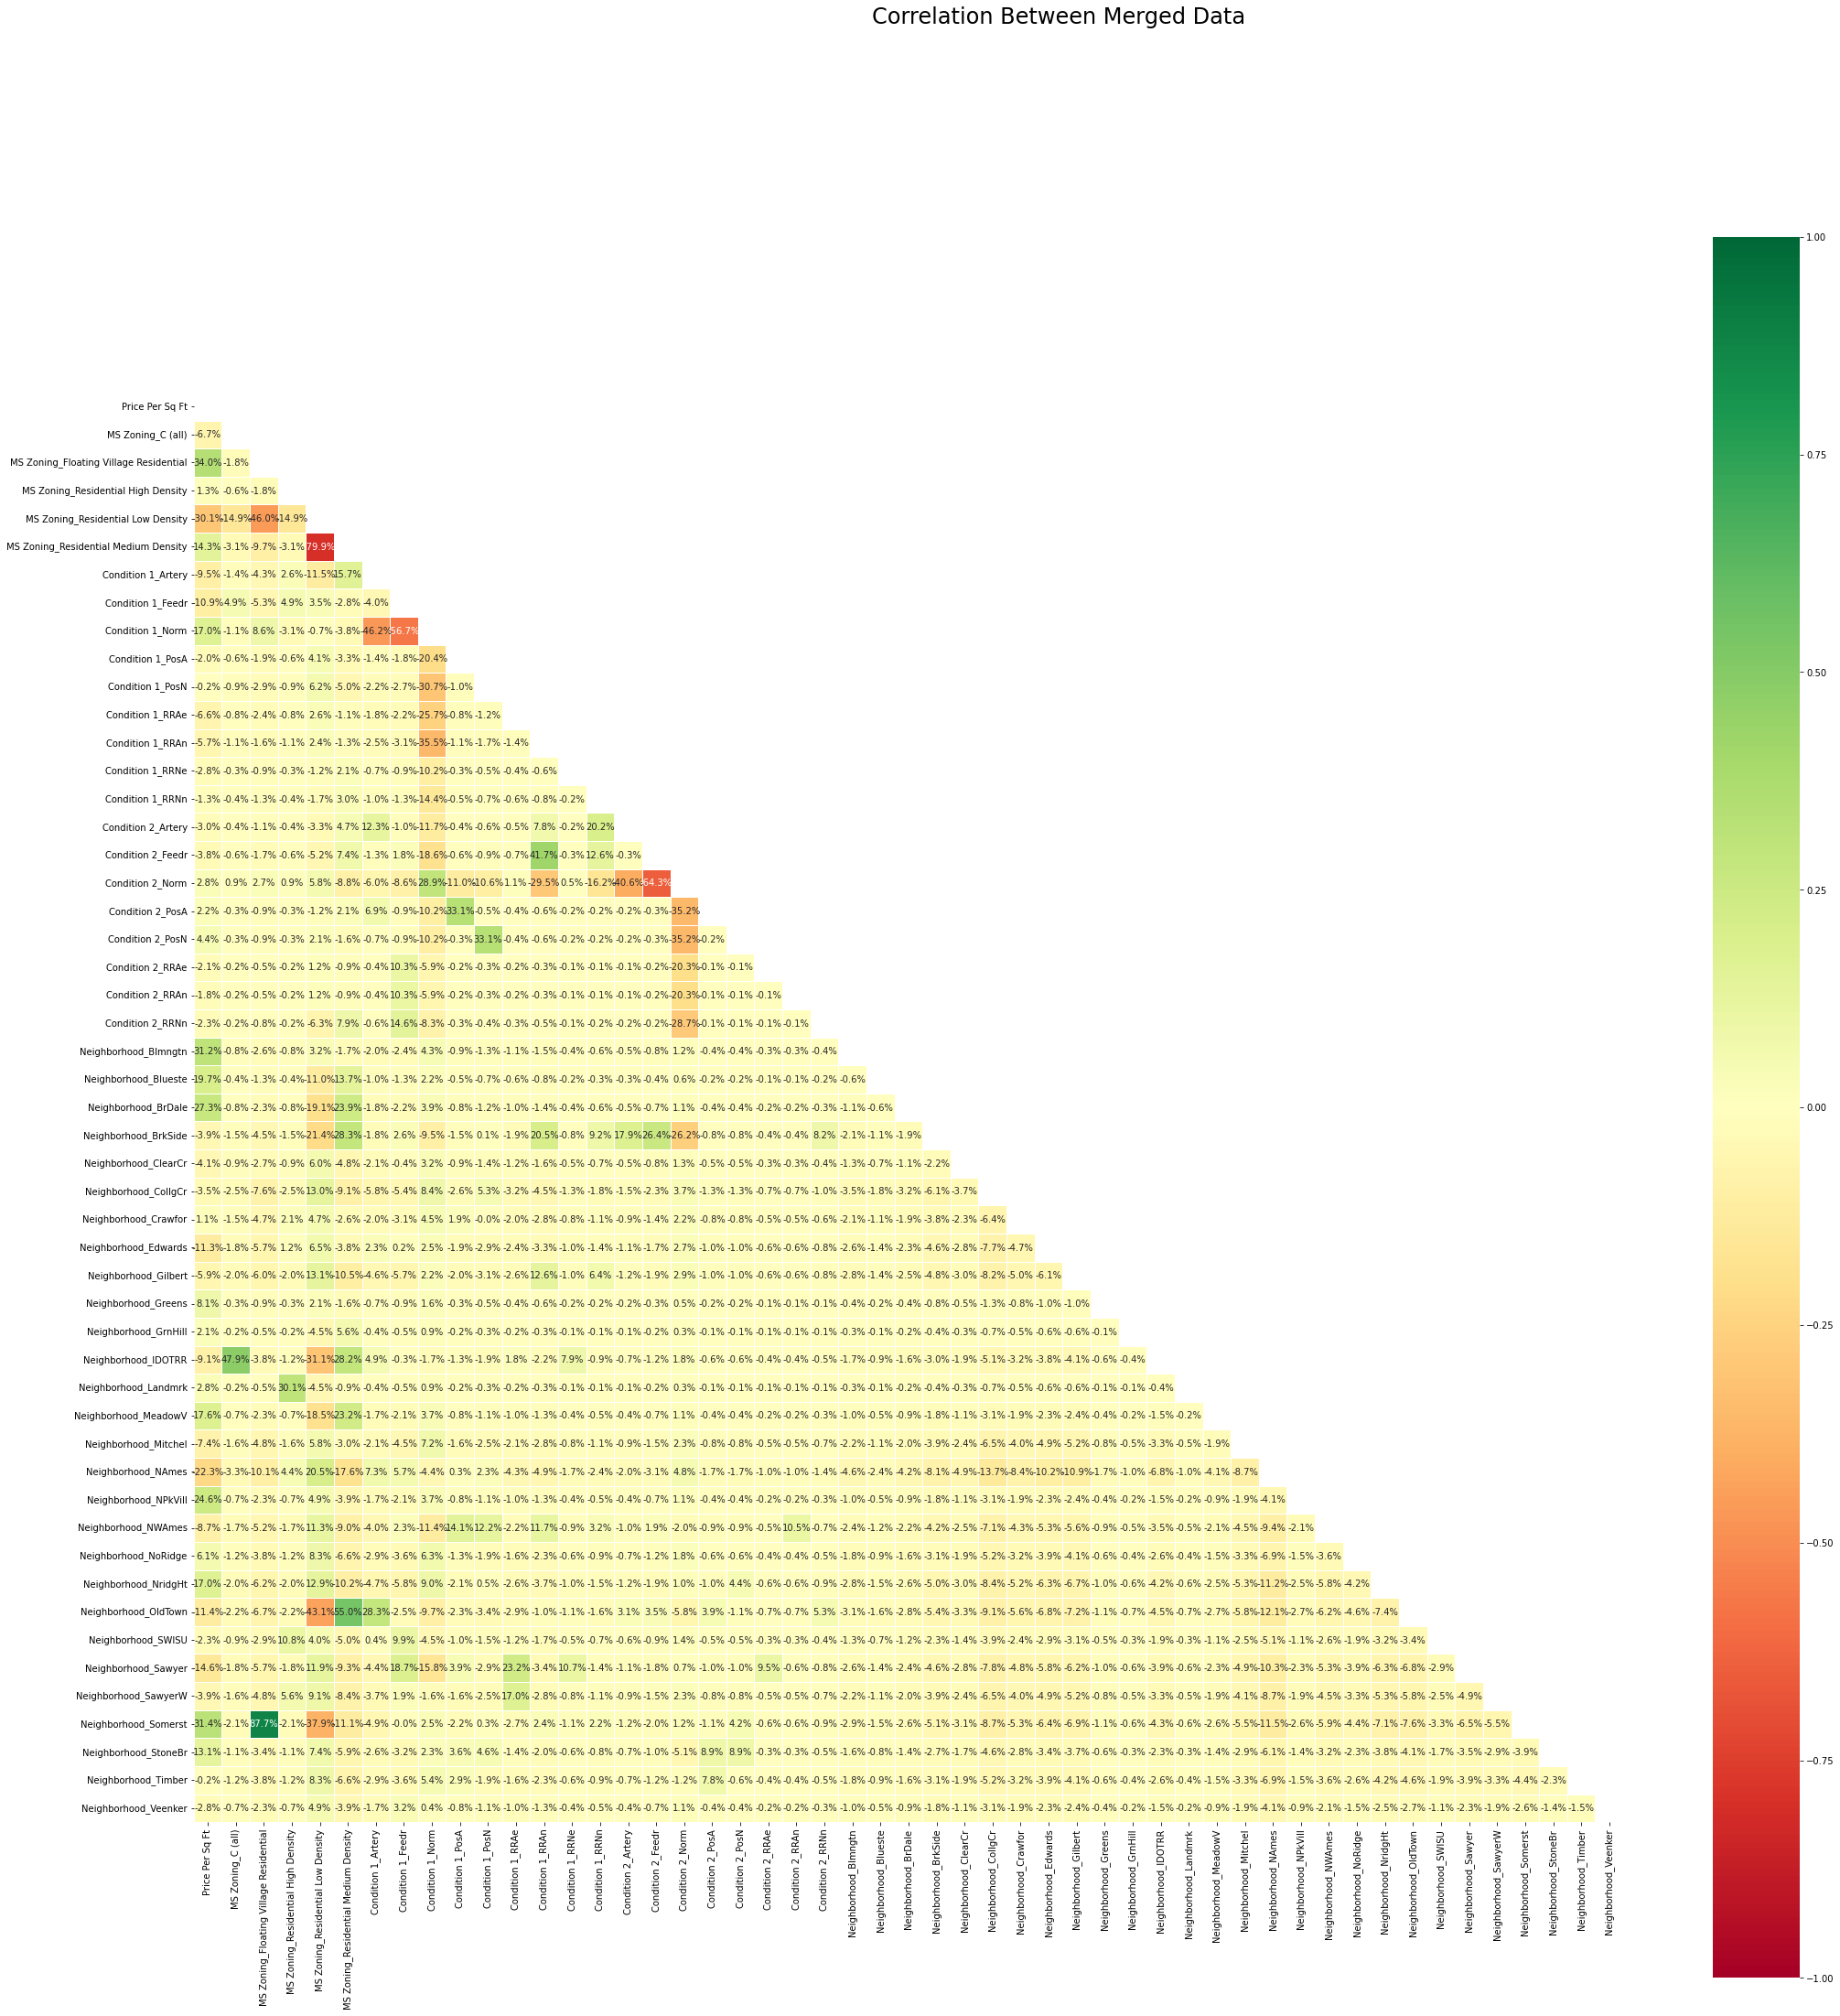

In [330]:
plot=plt.figure(figsize = (35,35))
plot.suptitle("Correlation Between Merged Data",size=24)
data_corr=zone_condition_df.corr()
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True
ax=sns.heatmap(data_corr, mask = mask, square = True, annot = True, fmt=".1%", vmin = -1, vmax = 1, linewidths = .5,cmap="RdYlGn")

### Summary of Zone and Neighbourhood Factors

In [331]:
zone_condition_df.corr()['Price Per Sq Ft'].sort_values()

MS Zoning_Residential Low Density        -0.301127
Neighborhood_NAmes                       -0.223229
Neighborhood_Sawyer                      -0.146110
Neighborhood_OldTown                     -0.114027
Neighborhood_Edwards                     -0.113350
Condition 1_Feedr                        -0.108601
Condition 1_Artery                       -0.094738
Neighborhood_IDOTRR                      -0.091133
Neighborhood_NWAmes                      -0.087419
Neighborhood_Mitchel                     -0.073864
MS Zoning_C (all)                        -0.067157
Condition 1_RRAe                         -0.066481
Neighborhood_Gilbert                     -0.058813
Condition 1_RRAn                         -0.057425
Neighborhood_ClearCr                     -0.040779
Neighborhood_SawyerW                     -0.039443
Neighborhood_BrkSide                     -0.039131
Condition 2_Feedr                        -0.037576
Neighborhood_CollgCr                     -0.035066
Condition 2_Artery             

In [332]:
zone_condition_df.corr()['Price Per Sq Ft'].sort_values(ascending=False)

Price Per Sq Ft                           1.000000
MS Zoning_Floating Village Residential    0.340090
Neighborhood_Somerst                      0.313665
Neighborhood_Blmngtn                      0.312134
Neighborhood_BrDale                       0.272756
Neighborhood_NPkVill                      0.246319
Neighborhood_Blueste                      0.197461
Neighborhood_MeadowV                      0.176224
Neighborhood_NridgHt                      0.170338
Condition 1_Norm                          0.169933
MS Zoning_Residential Medium Density      0.143416
Neighborhood_StoneBr                      0.131256
Neighborhood_Greens                       0.081191
Neighborhood_NoRidge                      0.060853
Condition 2_PosN                          0.043665
Condition 2_Norm                          0.028186
Neighborhood_Landmrk                      0.027892
Condition 2_PosA                          0.021940
Neighborhood_GrnHill                      0.020603
MS Zoning_Residential High Dens

MS Zoning_Residential Low Density        -0.301127

Neighborhood_NAmes                       -0.223229

MS Zoning_Floating Village Residential    0.340090

Neighborhood_Somerst                      0.313665

Neighborhood_Blmngtn                      0.312134

Neighborhood_BrDale                       0.272756

Neighborhood_NPkVill                      0.246319

## Sub-Factor 1B: Land Factors

In [333]:
location_proximity_price_df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Config', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'Land Contour', 'Land Slope', 'Street',
       'Lot Shape', 'Sale Type', 'SalePrice', 'Price Per Sq Ft'],
      dtype='object')

In [334]:
land_df = location_proximity_price_df[['Land Contour', 'Land Slope', 'Street','Lot Shape', 'Price Per Sq Ft', 'Lot Config','Bldg Type']]
land_df = pd.get_dummies(location_proximity_price_df,columns=['Land Contour', 'Land Slope', 'Street', 'Lot Shape', 'Lot Config','Bldg Type'])

In [335]:
land_df.corr()

,SalePrice,Price Per Sq Ft,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Street_Grvl,...,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE
SalePrice,1.000000,0.271195,-0.099421,0.218441,0.059192,-0.114501,-0.072480,0.069669,0.019195,-0.057952,...,-0.007320,0.163371,-0.012310,0.021494,-8.384005e-02,0.073871,-0.094669,-4.479312e-02,-0.114786,0.043013
Price Per Sq Ft,0.271195,1.000000,-0.097089,0.122387,-0.097536,0.022312,0.022527,0.000848,-0.072938,-0.046777,...,-0.130569,-0.080020,0.059191,-0.018496,1.363747e-01,-0.622710,-0.089883,-5.141445e-02,0.542174,0.524391
Land Contour_Bnk,-0.099421,-0.097089,1.000000,-0.041210,-0.027343,-0.582964,-0.167477,0.166514,0.027885,0.052911,...,0.002445,-0.040065,-0.032868,-0.012616,3.443502e-02,0.034617,0.089084,-6.835859e-03,-0.035637,-0.058650
Land Contour_HLS,0.218441,0.122387,-0.041210,1.000000,-0.030143,-0.642646,-0.301771,0.309199,0.022972,-0.009824,...,-0.007440,0.047742,-0.020501,-0.013908,-1.075676e-02,-0.046872,-0.027091,7.351898e-03,-0.024704,0.085065
Land Contour_Low,0.059192,-0.097536,-0.027343,-0.030143,1.000000,-0.426401,-0.464938,0.398368,0.267597,-0.006518,...,-0.023848,0.100648,-0.024041,-0.009228,-2.581989e-02,0.038762,0.012583,7.567568e-03,-0.026066,-0.042898
Land Contour_Lvl,-0.114501,0.022312,-0.582964,-0.642646,-0.426401,1.000000,0.526120,-0.499698,-0.157240,-0.023277,...,0.014617,-0.054288,0.045647,0.021641,-2.158752e-03,-0.007598,-0.042922,-4.264014e-03,0.051181,-0.001553
Land Slope_Gtl,-0.072480,0.022527,-0.167477,-0.301771,-0.464938,0.526120,1.000000,-0.947456,-0.305782,-0.043070,...,0.037823,-0.028750,0.038486,0.014772,-3.249763e-02,-0.007126,-0.030245,3.201671e-02,0.041728,-0.019915
Land Slope_Mod,0.069669,0.000848,0.166514,0.309199,0.398368,-0.499698,-0.947456,1.000000,-0.014849,0.046304,...,-0.035985,-0.005176,-0.036464,-0.013996,4.906993e-02,-0.002388,0.034719,-3.033443e-02,-0.039535,0.027970
Land Slope_Sev,0.019195,-0.072938,0.027885,0.022972,0.267597,-0.157240,-0.305782,-0.014849,1.000000,-0.003191,...,-0.011122,0.105272,-0.011768,-0.004517,-4.447057e-02,0.029380,-0.008799,-9.790130e-03,-0.012760,-0.020999
Street_Grvl,-0.057952,-0.046777,0.052911,-0.009824,-0.006518,-0.023277,-0.043070,0.046304,-0.003191,1.000000,...,0.009569,-0.012276,-0.007835,-0.003007,2.103702e-03,0.019560,-0.005858,-6.518082e-03,-0.008495,-0.013981


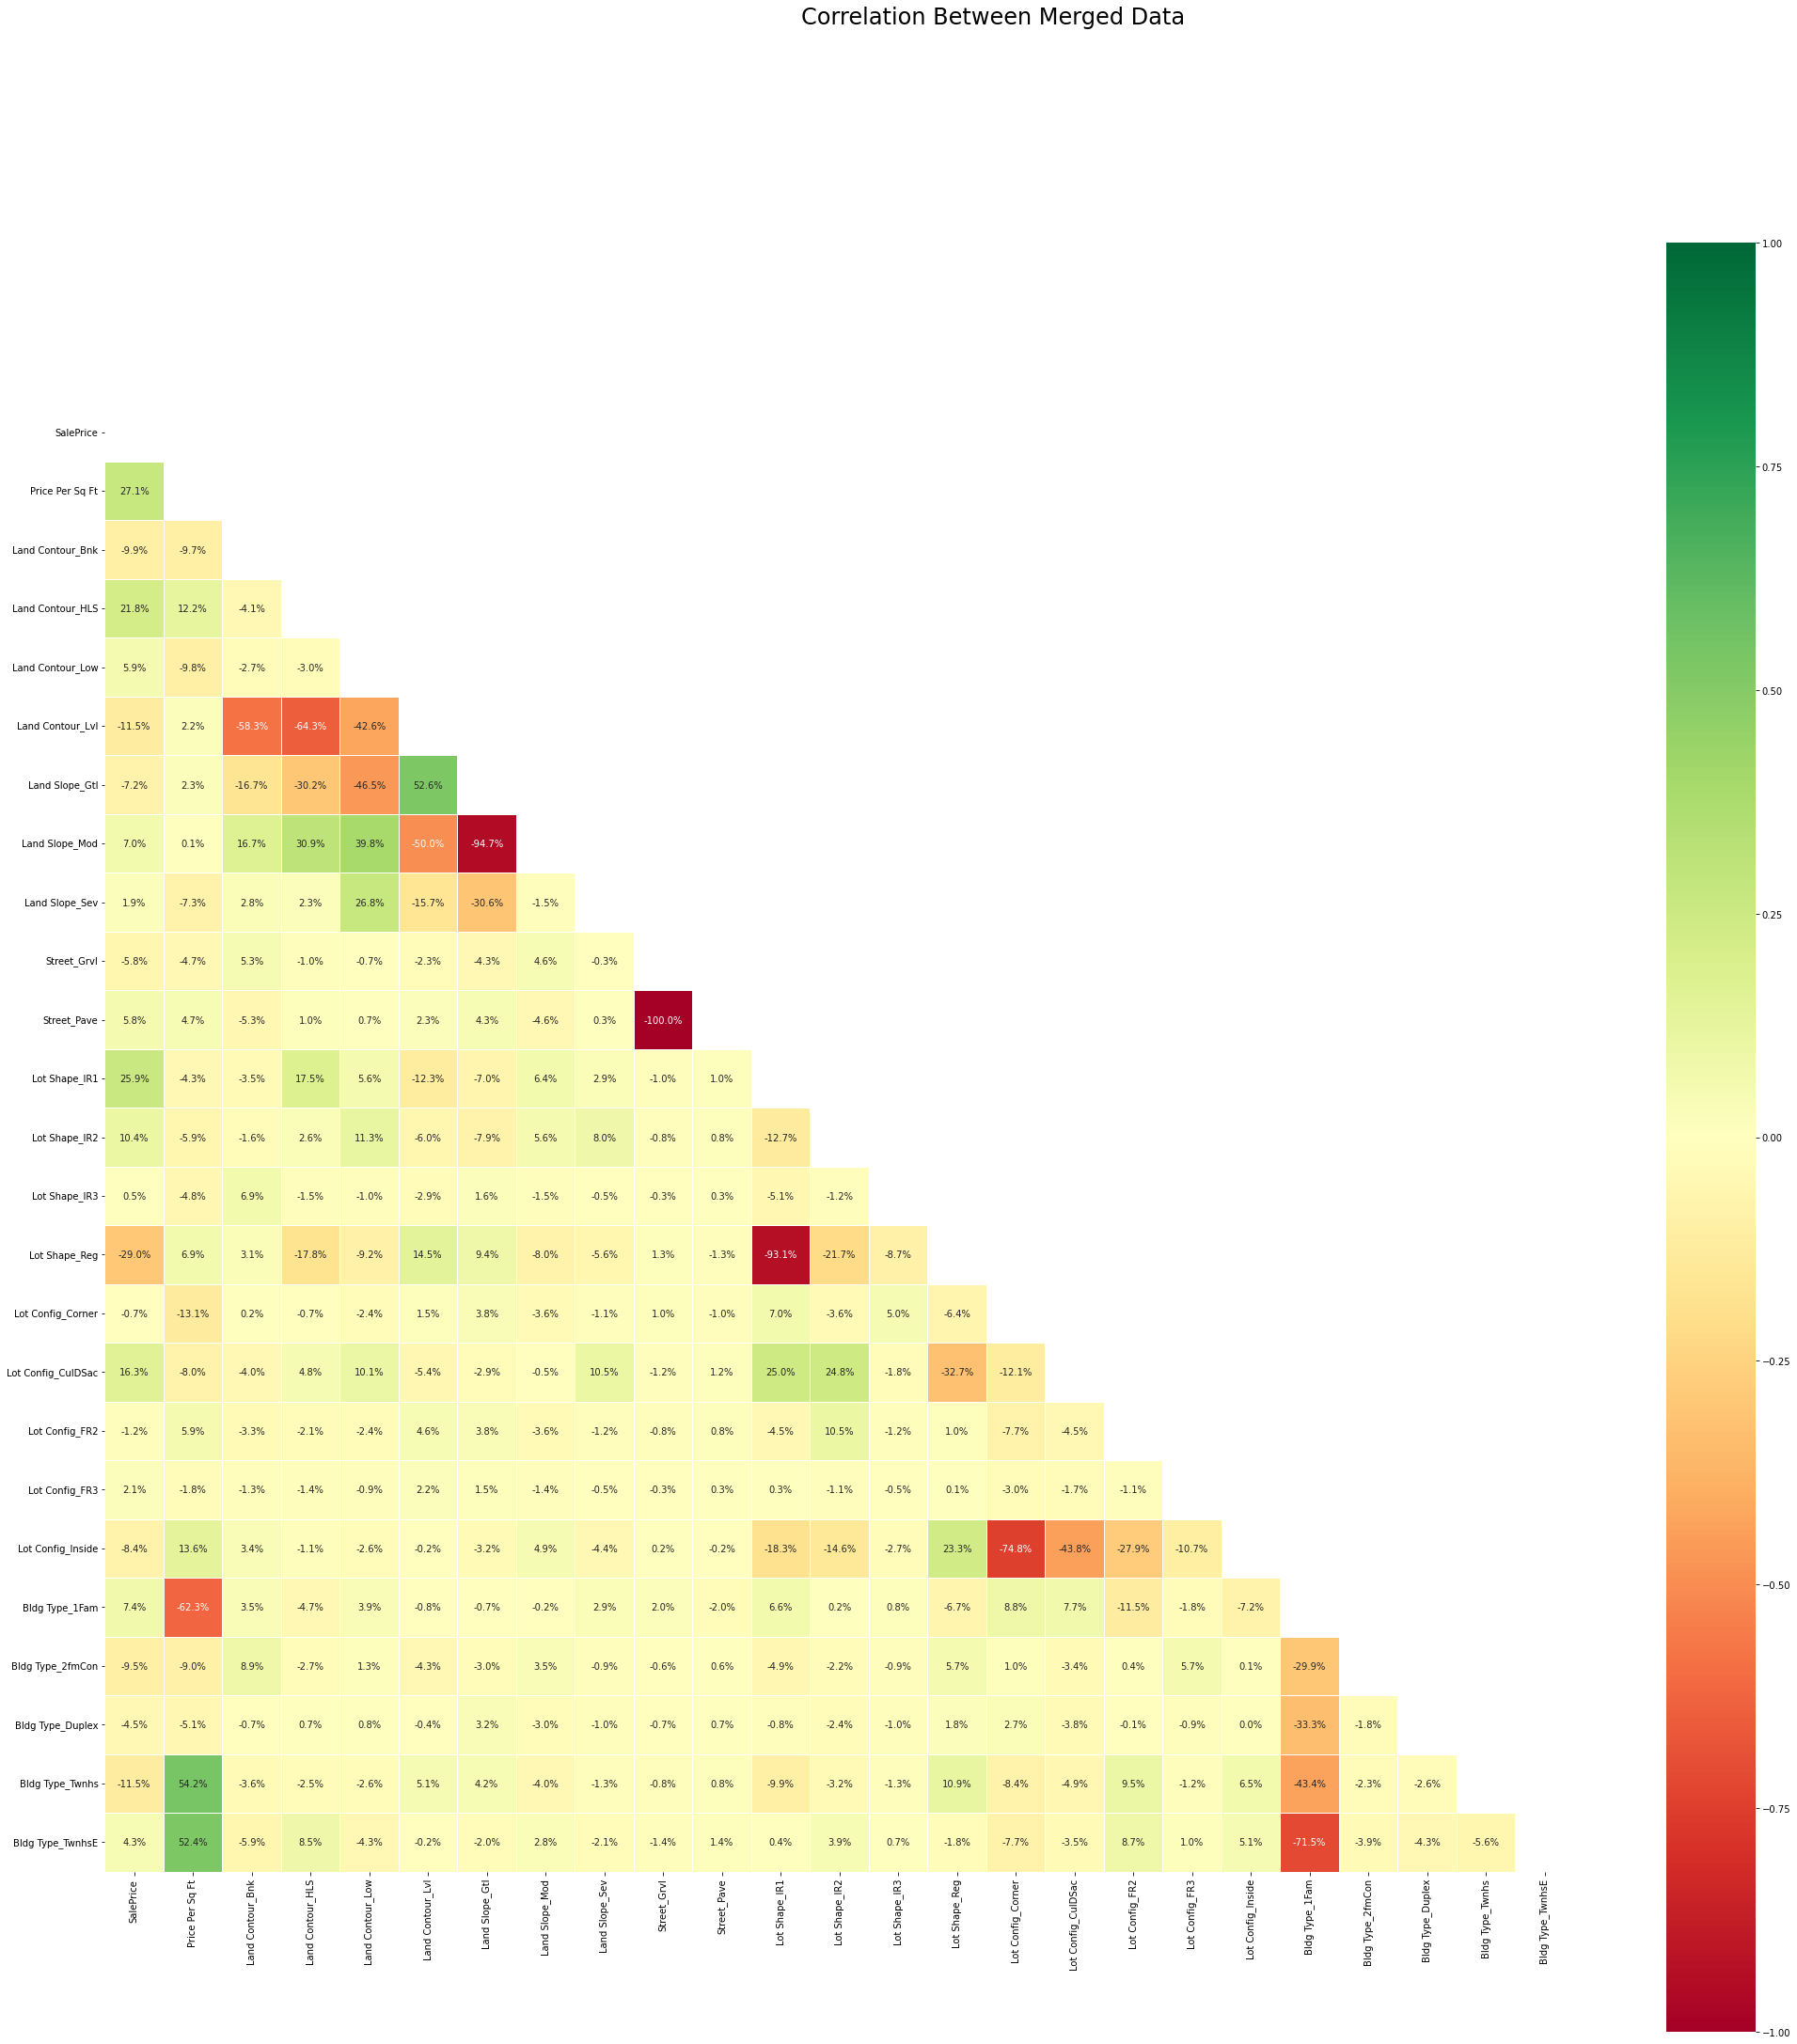

In [336]:
plot=plt.figure(figsize = (35,35))
plot.suptitle("Correlation Between Merged Data",size=24)
data_corr=land_df.corr()
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True
ax=sns.heatmap(data_corr, mask = mask, square = True, annot = True, fmt=".1%", vmin = -1, vmax = 1, linewidths = .5,cmap="RdYlGn")

### Summary of Land Factors

In [337]:
land_df.corr()['Price Per Sq Ft'].sort_values()

Bldg Type_1Fam       -0.622710
Lot Config_Corner    -0.130569
Land Contour_Low     -0.097536
Land Contour_Bnk     -0.097089
Bldg Type_2fmCon     -0.089883
Lot Config_CulDSac   -0.080020
Land Slope_Sev       -0.072938
Lot Shape_IR2        -0.058519
Bldg Type_Duplex     -0.051414
Lot Shape_IR3        -0.048025
Street_Grvl          -0.046777
Lot Shape_IR1        -0.043172
Lot Config_FR3       -0.018496
Land Slope_Mod        0.000848
Land Contour_Lvl      0.022312
Land Slope_Gtl        0.022527
Street_Pave           0.046777
Lot Config_FR2        0.059191
Lot Shape_Reg         0.069209
Land Contour_HLS      0.122387
Lot Config_Inside     0.136375
SalePrice             0.271195
Bldg Type_TwnhsE      0.524391
Bldg Type_Twnhs       0.542174
Price Per Sq Ft       1.000000
Name: Price Per Sq Ft, dtype: float64

In [338]:
land_df.corr()['Price Per Sq Ft'].sort_values(ascending=False)

Price Per Sq Ft       1.000000
Bldg Type_Twnhs       0.542174
Bldg Type_TwnhsE      0.524391
SalePrice             0.271195
Lot Config_Inside     0.136375
Land Contour_HLS      0.122387
Lot Shape_Reg         0.069209
Lot Config_FR2        0.059191
Street_Pave           0.046777
Land Slope_Gtl        0.022527
Land Contour_Lvl      0.022312
Land Slope_Mod        0.000848
Lot Config_FR3       -0.018496
Lot Shape_IR1        -0.043172
Street_Grvl          -0.046777
Lot Shape_IR3        -0.048025
Bldg Type_Duplex     -0.051414
Lot Shape_IR2        -0.058519
Land Slope_Sev       -0.072938
Lot Config_CulDSac   -0.080020
Bldg Type_2fmCon     -0.089883
Land Contour_Bnk     -0.097089
Land Contour_Low     -0.097536
Lot Config_Corner    -0.130569
Bldg Type_1Fam       -0.622710
Name: Price Per Sq Ft, dtype: float64

Bldg Type_1Fam       -0.622710

Lot Config_Corner    -0.130569

Bldg Type_Twnhs       0.542174

Bldg Type_TwnhsE      0.524391

SalePrice             0.271195

## Sub-Factor 1C: MS Subclass Factors

In [339]:
ms_subclass_df = location_proximity_price_df[['Price Per Sq Ft', 'MS SubClass']]
ms_subclass_df = pd.get_dummies(location_proximity_price_df,columns=['MS SubClass'])

In [340]:
ms_subclass_df.corr()

,SalePrice,Price Per Sq Ft,MS SubClass_1 Storey 1945 older,MS SubClass_1 Storey Newer All,MS SubClass_1 Storey PUD,MS SubClass_1 Storey W/Finished Attic,MS SubClass_1.5 Finished,MS SubClass_1.5 Storey PUD,MS SubClass_1.5 Unfinished,MS SubClass_2 Storey 1946 Newer,MS SubClass_2 Storey 1946 Older,MS SubClass_2 Storey PUD,MS SubClass_2.5 Story All,MS SubClass_Duplex All,MS SubClass_Family Conversion,MS SubClass_PUD Multi,MS SubClass_Split,MS SubClass_Split Foyer
SalePrice,1.000000,0.271195,-0.223368,0.055966,0.083473,-0.040061,-0.191496,-0.011458,-0.060633,0.337426,-0.088395,-0.125866,0.032893,-0.044793,-0.091872,-0.055173,-0.050011,-0.053275
Price Per Sq Ft,0.271195,1.000000,-0.131378,-0.249424,0.455424,-0.018491,-0.128728,0.115060,-0.018720,-0.000270,-0.042571,0.568168,-0.030436,-0.051414,-0.090446,0.135922,-0.097095,-0.055449
MS SubClass_1 Storey 1945 older,-0.223368,-0.131378,1.000000,-0.161421,-0.055568,-0.009377,-0.066065,-0.004685,-0.014084,-0.104010,-0.043363,-0.043639,-0.017589,-0.028772,-0.025859,-0.013275,-0.044457,-0.024512
MS SubClass_1 Storey Newer All,0.055966,-0.249424,-0.161421,1.000000,-0.216712,-0.036569,-0.257649,-0.018270,-0.054927,-0.405632,-0.169113,-0.170189,-0.068597,-0.112208,-0.100847,-0.051772,-0.173381,-0.095595
MS SubClass_1 Storey PUD,0.083473,0.455424,-0.055568,-0.216712,1.000000,-0.012589,-0.088694,-0.006289,-0.018908,-0.139636,-0.058216,-0.058586,-0.023614,-0.038627,-0.034716,-0.017822,-0.059685,-0.032908
MS SubClass_1 Storey W/Finished Attic,-0.040061,-0.018491,-0.009377,-0.036569,-0.012589,1.000000,-0.014967,-0.001061,-0.003191,-0.023563,-0.009824,-0.009886,-0.003985,-0.006518,-0.005858,-0.003007,-0.010072,-0.005553
MS SubClass_1.5 Finished,-0.191496,-0.128728,-0.066065,-0.257649,-0.088694,-0.014967,1.000000,-0.007477,-0.022480,-0.166013,-0.069213,-0.069653,-0.028075,-0.045923,-0.041274,-0.021189,-0.070960,-0.039124
MS SubClass_1.5 Storey PUD,-0.011458,0.115060,-0.004685,-0.018270,-0.006289,-0.001061,-0.007477,1.000000,-0.001594,-0.011772,-0.004908,-0.004939,-0.001991,-0.003256,-0.002927,-0.001502,-0.005032,-0.002774
MS SubClass_1.5 Unfinished,-0.060633,-0.018720,-0.014084,-0.054927,-0.018908,-0.003191,-0.022480,-0.001594,1.000000,-0.035391,-0.014755,-0.014849,-0.005985,-0.009790,-0.008799,-0.004517,-0.015127,-0.008341
MS SubClass_2 Storey 1946 Newer,0.337426,-0.000270,-0.104010,-0.405632,-0.139636,-0.023563,-0.166013,-0.011772,-0.035391,1.000000,-0.108966,-0.109659,-0.044200,-0.072300,-0.064980,-0.033358,-0.111716,-0.061595


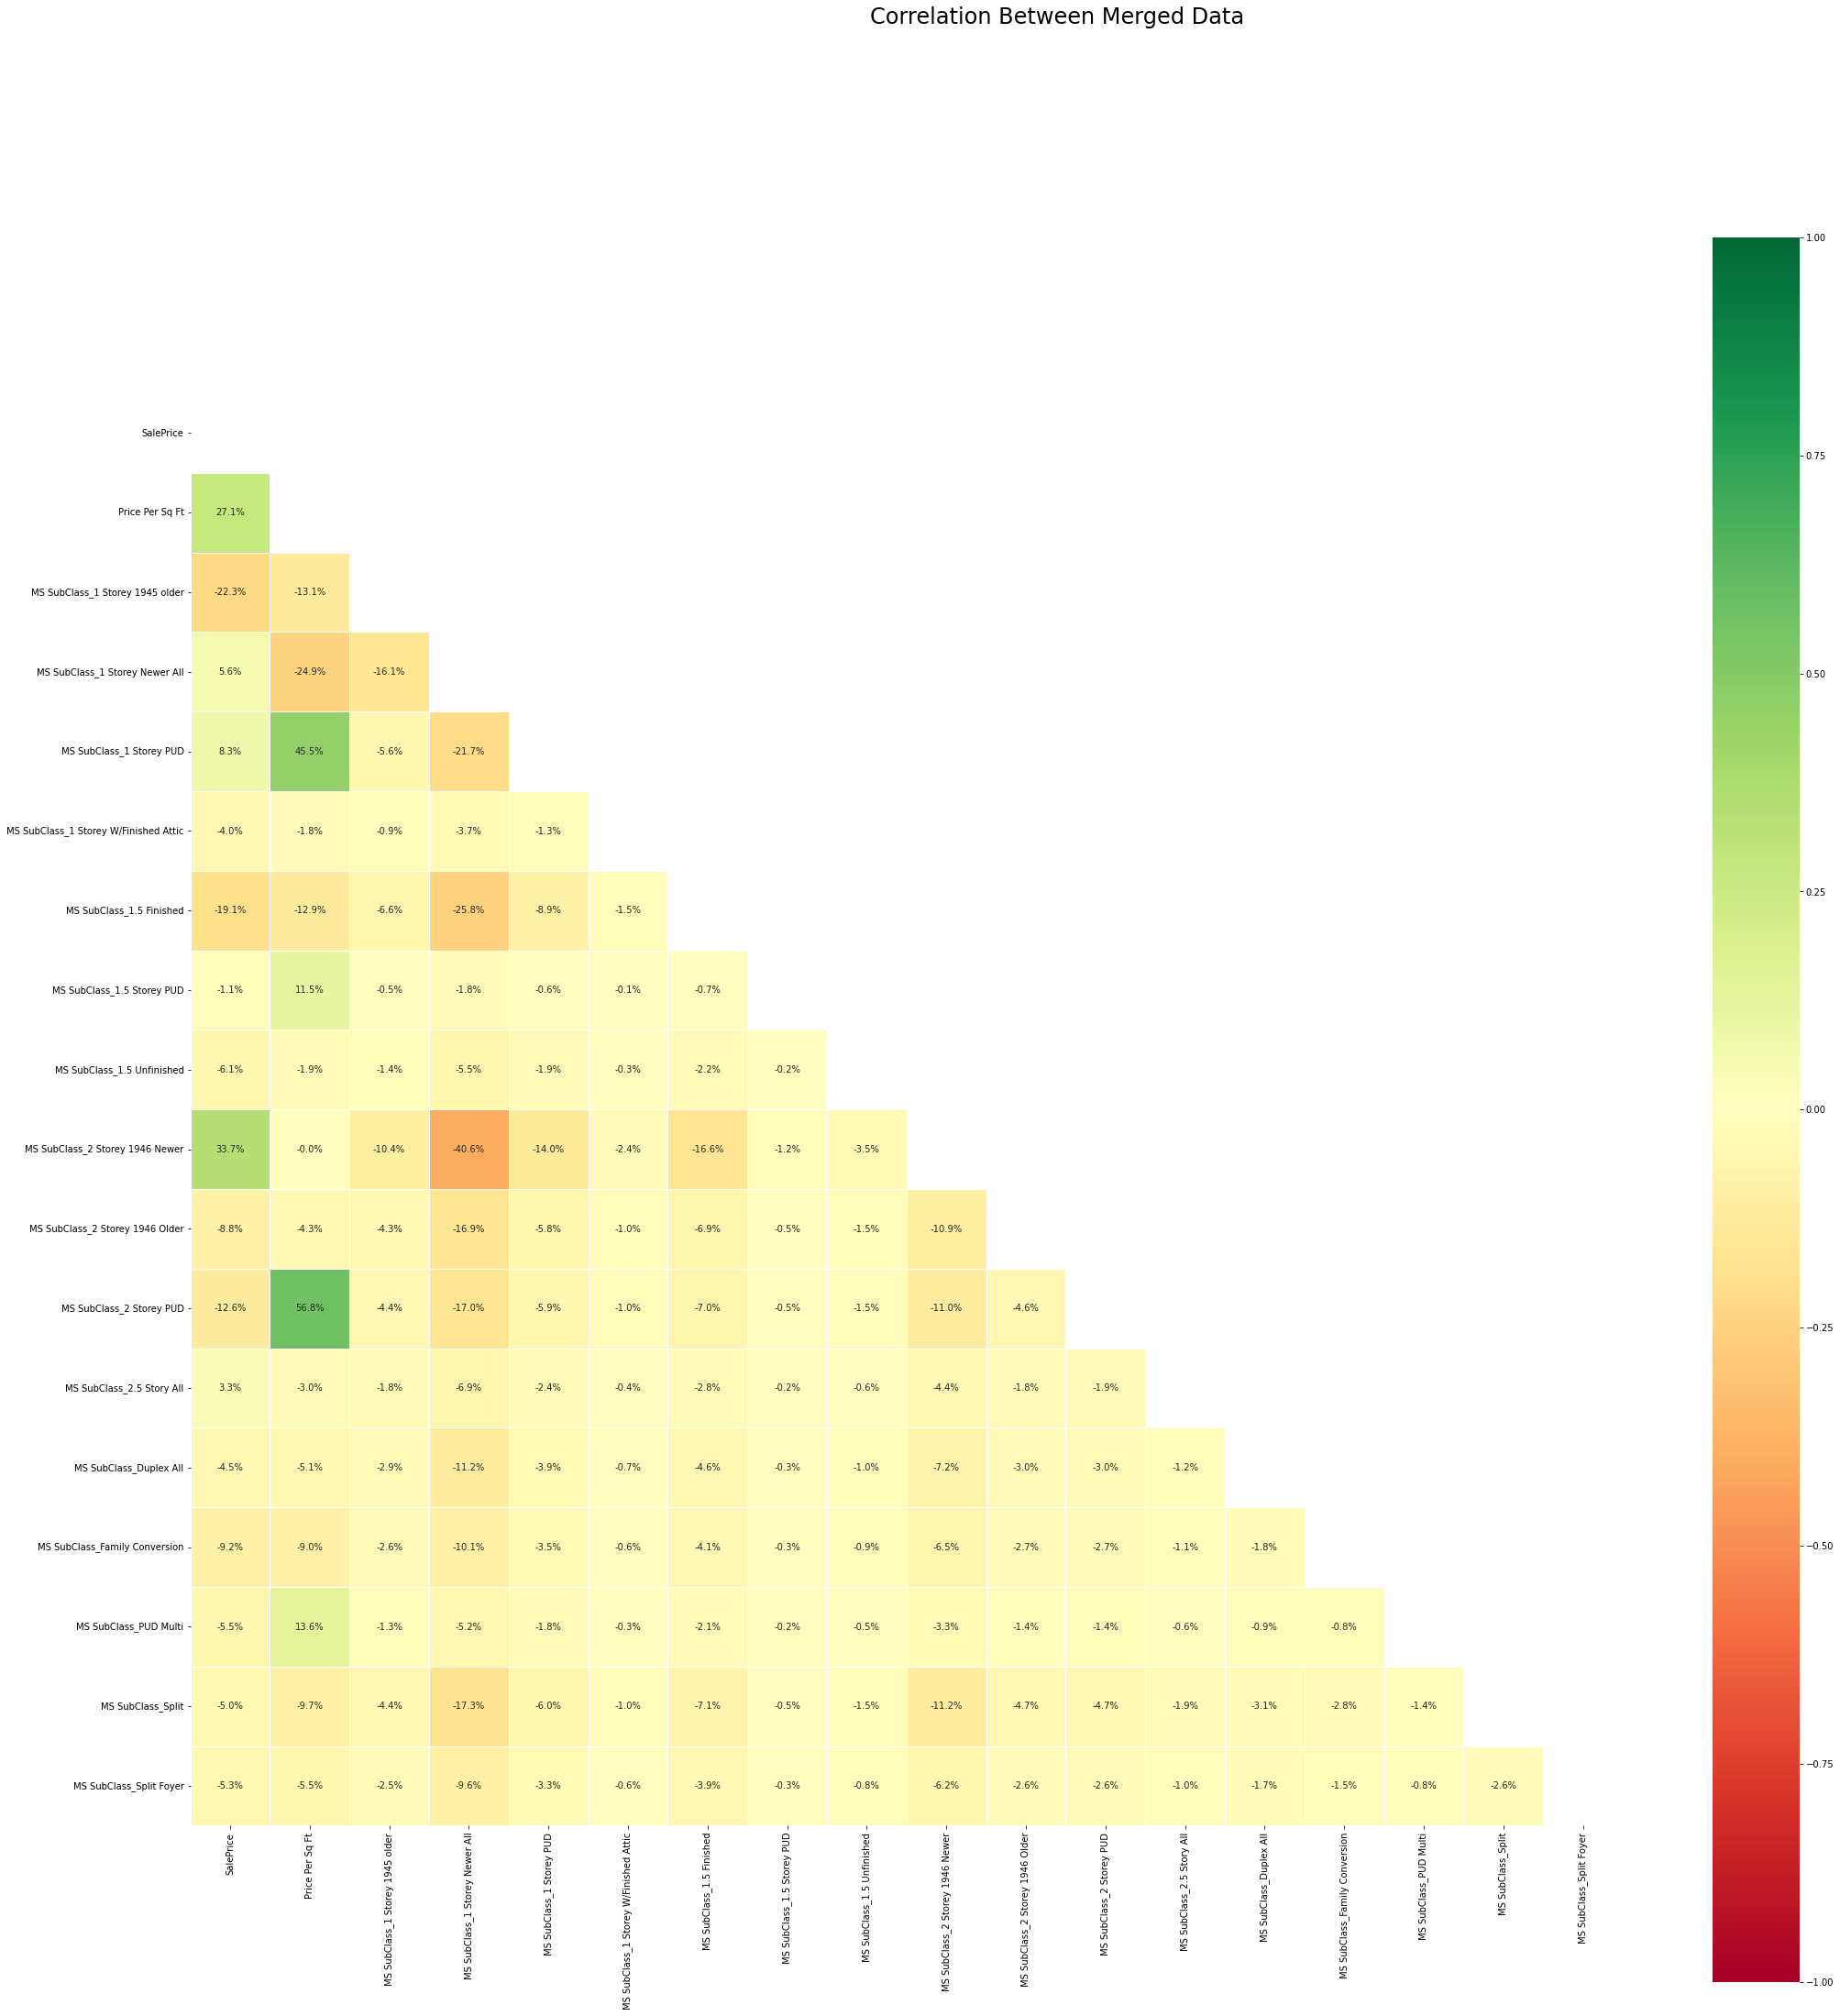

In [341]:
plot=plt.figure(figsize = (35,35))
plot.suptitle("Correlation Between Merged Data",size=24)
data_corr=ms_subclass_df.corr()
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True
ax=sns.heatmap(data_corr, mask = mask, square = True, annot = True, fmt=".1%", vmin = -1, vmax = 1, linewidths = .5,cmap="RdYlGn")

### Summary of MS Subclass Factors

In [342]:
ms_subclass_df.corr()['Price Per Sq Ft'].sort_values()

MS SubClass_1 Storey Newer All          -0.249424
MS SubClass_1 Storey 1945 older         -0.131378
MS SubClass_1.5 Finished                -0.128728
MS SubClass_Split                       -0.097095
MS SubClass_Family Conversion           -0.090446
MS SubClass_Split Foyer                 -0.055449
MS SubClass_Duplex All                  -0.051414
MS SubClass_2 Storey 1946 Older         -0.042571
MS SubClass_2.5 Story All               -0.030436
MS SubClass_1.5 Unfinished              -0.018720
MS SubClass_1 Storey W/Finished Attic   -0.018491
MS SubClass_2 Storey 1946 Newer         -0.000270
MS SubClass_1.5 Storey PUD               0.115060
MS SubClass_PUD Multi                    0.135922
SalePrice                                0.271195
MS SubClass_1 Storey PUD                 0.455424
MS SubClass_2 Storey PUD                 0.568168
Price Per Sq Ft                          1.000000
Name: Price Per Sq Ft, dtype: float64

MS SubClass_1 Storey Newer All          -0.249424

MS SubClass_1 Storey PUD                 0.455424

MS SubClass_2 Storey PUD                 0.568168

## Model Location and Proximity Factors using OLS Regression

### Zone and Neighbourhood Factors

#### Model Using sklearn

In [343]:
zone_condition_df.head()

,Price Per Sq Ft,MS Zoning_C (all),MS Zoning_Floating Village Residential,MS Zoning_Residential High Density,MS Zoning_Residential Low Density,MS Zoning_Residential Medium Density,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,9.654509,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,19.143752,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,13.759152,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,17.751479,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,9.729540,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [344]:
X_train, X_test, y_train, y_test = train_test_split(zone_condition_df.dropna().drop(columns=['Price Per Sq Ft']),
                                                    zone_condition_df.dropna()['Price Per Sq Ft'],
                                                    test_size=0.2,
                                                    random_state=123)

In [352]:
# Step 1. Instantiate the model.
model = LinearRegression()

# Step 2. Fit the model on the training data.
model.fit(X_train, y_train)

# Step 3. Generate predictions.
preds = model.predict(X_test)

In [353]:

# Check the MSE on the training and testing sets.

print(f'MSE on testing set: {mean_squared_error(y_train, model.predict(X_train))}')
print(f'MSE on training set: {mean_squared_error(y_test, preds)}')

MSE on testing set: 65.17185897199941
MSE on training set: 2.3515011876743668e+25


In [354]:
# Check the R^2 on the training and testing sets.

print(f'R^2 on testing set: {r2_score(y_train, model.predict(X_train))}')
print(f'R^2 on training set: {r2_score(y_test, preds)}')

R^2 on testing set: 0.6298499626245647
R^2 on training set: -1.612442688977086e+23


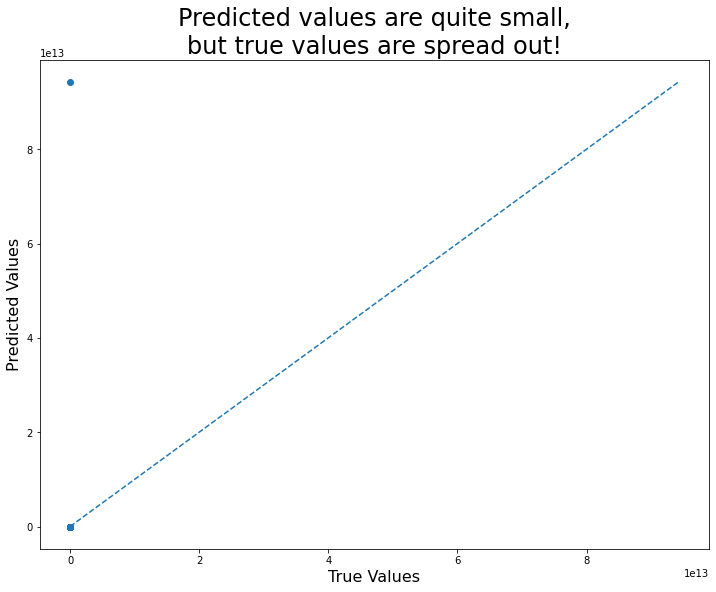

In [355]:
plt.figure(figsize = (12, 9))

# Examine the relationship between observed and predicted values.
plt.scatter(y_test, preds)

# Line showing perfect predictions.
plt.plot([0, max(max(y_test),max(preds))],
         [0, max(max(y_test),max(preds))],
         linestyle = '--')

plt.title('Predicted values are quite small,\nbut true values are spread out!', fontsize = 24)
plt.xlabel('True Values', fontsize = 16)
plt.ylabel('Predicted Values', fontsize = 16);

In [358]:
print(f'MSE of baseline model: {mean_squared_error(y_test, [np.mean(y_train)] * len(y_test))}')

MSE of baseline model: 146.1055341285836


In [359]:
print(f'R^2 of baseline model: {r2_score(y_test, [np.mean(y_train)] * len(y_test))}')

R^2 of baseline model: -0.0018570331139060592


#### Model Using statsmodels

In [360]:
# Remember, we need to add a constant in statsmodels!
X_train = sm.add_constant(X_train)

In [361]:
model_sm = sm.OLS(y_train, X_train).fit()

In [362]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Price Per Sq Ft   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     55.74
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          6.88e-281
Time:                        22:21:16   Log-Likelihood:                -5289.2
No. Observations:                1509   AIC:                         1.067e+04
Df Residuals:                    1463   BIC:                         1.092e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -1.948e+13   3.03e+13     -0.643      0.520   -7.89e+13    3.99e+13
MS Zoning_C (all)                      -5.819e+12   9.05e+12     -0.643      0.520   -2.36e+13    1.19e+13
MS Zoning_Floating Village Residential -5.819e+12   9.05e+12     -0.643      0.520   -2.36e+13    1.19e+13
MS Zoning_Residential High Density     -5.819e+12   9.05e+12     -0.643      0.520   -2.36e+13    1.19e+13
MS Zoning_Residential Low Density      -5.819e+12   9.05e+12     -0.643      0.520   -2.36e+13    1.19e+13
MS Zoning_Residential Medium Density   -5.819e+12   9.05e+12     -0.643      0.520   -2.36e+13    1.19e+13
Condition 1_Artery                      3.364e+12   5.23e+12      0.643      0.520    -6.9e+12    1.36e+13
Condition 1_Feedr                       3.364e+12   5.23e+12      0.643      0.520    -6.9e+12    1.36e+13
Condition 1_Norm                        3.364e+12   5.23e+12      0.643      0.520    -6.9e+12    1.36e+13
Condition 1_PosA                        3.364e+12   5.23e+12      0.643      0.520    -6.9e+12    1.36e+13
Condition 1_PosN                        3.364e+12   5.23e+12      0.643      0.520    -6.9e+12    1.36e+13
Condition 1_RRAe                        3.364e+12   5.23e+12      0.643      0.520    -6.9e+12    1.36e+13
Condition 1_RRAn                        3.364e+12   5.23e+12      0.643      0.520    -6.9e+12    1.36e+13
Condition 1_RRNe                        3.364e+12   5.23e+12      0.643      0.520    -6.9e+12    1.36e+13
Condition 1_RRNn                        3.364e+12   5.23e+12      0.643      0.520    -6.9e+12    1.36e+13
Condition 2_Artery                      2.327e+13   3.62e+13      0.643      0.520   -4.77e+13    9.43e+13
Condition 2_Feedr                       2.327e+13   3.62e+13      0.643      0.520   -4.77e+13    9.43e+13
Condition 2_Norm                        2.327e+13   3.62e+13      0.643      0.520   -4.77e+13    9.43e+13
Condition 2_PosA                        2.327e+13   3.62e+13      0.643      0.520   -4.77e+13    9.43e+13
Condition 2_PosN                        2.327e+13   3.62e+13      0.643      0.520   -4.77e+13    9.43e+13
Condition 2_RRAe                        2.327e+13   3.62e+13      0.643      0.520   -4.77e+13    9.43e+13
Condition 2_RRAn                        2.327e+13   3.62e+13      0.643      0.520   -4.77e+13    9.43e+13
Condition 2_RRNn                        2.327e+13   3.62e+13      0.643      0.520   -4.77e+13    9.43e+13
Neighborhood_Blmngtn                   -1.341e+12   2.09e+12     -0.643      0.520   -5.43e+12    2.75e+12
Neighborhood_Blueste                   -1.341e+12   2.09e+12     -0.643      0.520   -5.43e+12    2.75e+12
Neighborhood_BrDale                    -1.341e+12   2.09e+12     -0.643      0.520   -5

### Land Factors

In [345]:
land_df.head()

,MS SubClass,MS Zoning,Neighborhood,Condition 1,Condition 2,Sale Type,SalePrice,Price Per Sq Ft,Land Contour_Bnk,Land Contour_HLS,...,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE
0,2 Storey 1946 Newer,Residential Low Density,Sawyer,RRAe,Norm,WD,130500,9.654509,0,0,...,0,1,0,0,0,1,0,0,0,0
1,2 Storey 1946 Newer,Residential Low Density,SawyerW,Norm,Norm,WD,220000,19.143752,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1 Storey Newer All,Residential Low Density,NAmes,Norm,Norm,WD,109000,13.759152,0,0,...,0,0,0,0,1,1,0,0,0,0
3,2 Storey 1946 Newer,Residential Low Density,Timber,Norm,Norm,WD,174000,17.751479,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1.5 Finished,Residential Low Density,SawyerW,Norm,Norm,WD,138500,9.729540,0,0,...,0,0,0,0,1,1,0,0,0,0


### MS Subclass Factors

In [346]:
ms_subclass_df.head()

,MS Zoning,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,Land Contour,Land Slope,Street,Lot Shape,...,MS SubClass_1.5 Unfinished,MS SubClass_2 Storey 1946 Newer,MS SubClass_2 Storey 1946 Older,MS SubClass_2 Storey PUD,MS SubClass_2.5 Story All,MS SubClass_Duplex All,MS SubClass_Family Conversion,MS SubClass_PUD Multi,MS SubClass_Split,MS SubClass_Split Foyer
0,Residential Low Density,CulDSac,Sawyer,RRAe,Norm,1Fam,Lvl,Gtl,Pave,IR1,...,0,1,0,0,0,0,0,0,0,0
1,Residential Low Density,CulDSac,SawyerW,Norm,Norm,1Fam,Lvl,Gtl,Pave,IR1,...,0,1,0,0,0,0,0,0,0,0
2,Residential Low Density,Inside,NAmes,Norm,Norm,1Fam,Lvl,Gtl,Pave,Reg,...,0,0,0,0,0,0,0,0,0,0
3,Residential Low Density,Inside,Timber,Norm,Norm,1Fam,Lvl,Gtl,Pave,Reg,...,0,1,0,0,0,0,0,0,0,0
4,Residential Low Density,Inside,SawyerW,Norm,Norm,1Fam,Lvl,Gtl,Pave,IR1,...,0,0,0,0,0,0,0,0,0,0


# Factor 2: Quality and Condition of Home

In [347]:
quality_condition_df
price_factors_df

,Sale Type,SalePrice,Price Per Sq Ft
0,WD,130500,9.654509
1,WD,220000,19.143752
2,WD,109000,13.759152
3,WD,174000,17.751479
4,WD,138500,9.729540
...,...,...,...
1882,WD,298751,26.094069
1883,WD,82500,6.684492
1884,WD,177000,23.418894
1885,WD,144000,13.846154


# Factor 3: Parts of the Home

In [348]:

parts_of_home_df

price_factors_df

,Sale Type,SalePrice,Price Per Sq Ft
0,WD,130500,9.654509
1,WD,220000,19.143752
2,WD,109000,13.759152
3,WD,174000,17.751479
4,WD,138500,9.729540
...,...,...,...
1882,WD,298751,26.094069
1883,WD,82500,6.684492
1884,WD,177000,23.418894
1885,WD,144000,13.846154


# Factor 4: Utilities and Intangible Factors

In [349]:
utilities_intangible_df
price_factors_df

,Sale Type,SalePrice,Price Per Sq Ft
0,WD,130500,9.654509
1,WD,220000,19.143752
2,WD,109000,13.759152
3,WD,174000,17.751479
4,WD,138500,9.729540
...,...,...,...
1882,WD,298751,26.094069
1883,WD,82500,6.684492
1884,WD,177000,23.418894
1885,WD,144000,13.846154


# Factor 5: Time Factors

In [350]:

time_factors_df
price_factors_df

,Sale Type,SalePrice,Price Per Sq Ft
0,WD,130500,9.654509
1,WD,220000,19.143752
2,WD,109000,13.759152
3,WD,174000,17.751479
4,WD,138500,9.729540
...,...,...,...
1882,WD,298751,26.094069
1883,WD,82500,6.684492
1884,WD,177000,23.418894
1885,WD,144000,13.846154


# Factor 6: Price Factors

In [351]:

price_factors_df

,Sale Type,SalePrice,Price Per Sq Ft
0,WD,130500,9.654509
1,WD,220000,19.143752
2,WD,109000,13.759152
3,WD,174000,17.751479
4,WD,138500,9.729540
...,...,...,...
1882,WD,298751,26.094069
1883,WD,82500,6.684492
1884,WD,177000,23.418894
1885,WD,144000,13.846154
